1.   지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
2.   연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
3.   출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.
4.   **리메이크에 관한 분석 추가.**

# **라이브러리, 데이터 불러오기**

In [3]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# 데이터 업로드
from google.colab import files
uploaded = files.upload();

Saving vgames2.csv to vgames2.csv


In [3]:
df = pd.read_csv('vgames2.csv').drop('Unnamed: 0', axis=1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [4]:
df.info()
# 수치적 계산을 할려면 Sales를 Float으로 변환하자.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [5]:
print(df.isnull().sum())

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64


# **데이터 전처리**

In [6]:
pd.set_option('mode.chained_assignment',  None)

In [7]:
df['NA_Sales'][df['NA_Sales'].str.contains('K') == True].str.replace('K','').astype(float).sort_values()

9437        0.0
6153        0.0
5334        0.0
15111       0.0
5175        0.0
          ...  
11996    2010.0
13935    2570.0
9829     2930.0
1964     4100.0
1971     5170.0
Name: NA_Sales, Length: 100, dtype: float64

In [8]:
df[1971:1972]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1971,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5170K,4.05,4.34,0.79


In [9]:
df['NA_Sales'][df['NA_Sales'].str.contains('M') == True].str.replace('M','').astype(float).sort_values()

9563     0.00
4581     0.00
4754     0.00
5312     0.00
7597     0.00
         ... 
4010     1.30
7499     2.66
577      5.55
12600    7.03
10913    9.63
Name: NA_Sales, Length: 100, dtype: float64

In [10]:
df[10913:10914]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10913,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63M,5.31,0.06,1.38


In [11]:
#기본이 백만단위인데 K는 소숫점이 아니고 M은 소숫점 단위인것을 보면 K는 천단위로 잘못 표기된 것이고 M은 불필요하게 표시된 것이라 판단.
#가장 높은 표본을 뽑아보니 납득이 가는 표본.

def cov_sales(X):
  cov_M = df[X][df[X].str.contains('M') == True].str.replace('M','').astype(float)
  df[X][df[X].str.contains('M') == True] = cov_M.astype(str)
  cov_K = df[X][df[X].str.contains('K') == True].str.replace('K','').astype(float)/1000
  df[X][df[X].str.contains('K') == True] = cov_K.astype(str)
  df[X] = df[X].astype(float)

In [12]:
cov_sales('NA_Sales')
cov_sales('EU_Sales')
cov_sales('JP_Sales')
cov_sales('Other_Sales')

In [13]:
#Total_Sales 추가

def sales_sum():
  sum = round(df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales'],2)
  return sum

In [14]:
df['Total_Sales'] = sales_sum()

In [15]:
df
#Year의 결측치가 많으나 연도별 트렌드 게임의 분석 결과에 영향을 줄만큼 판매량이 큰 상위 10퍼의 제품에는 결측치를 채워넣는다. 
#그리고 그 밑의 제품은 삭제한다. 
#다른 결측치에 대해서도 같은 프로세스.
#퍼블리셔의 결측치는 놔두기로 한다.

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [16]:
np.percentile(df['Total_Sales'], 90)

1.21

In [17]:
year_null_index = df['Total_Sales'][df.Year.isnull() == True].sort_values().tail(18).index

In [18]:
df.loc[year_null_index]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
13752,NASCAR Thunder 2003,PS2,NaN,Racing,Unknown,0.60,0.46,0.00,0.16,1.22
14765,Combat,2600,NaN,Action,Atari,1.17,0.07,0.00,0.01,1.25
5720,Adventure,2600,NaN,Adventure,Atari,1.21,0.08,0.00,0.01,1.30
9958,LEGO Batman: The Videogame,PSP,NaN,Action,Warner Bros. Interactive Entertainment,0.57,0.46,0.00,0.28,1.31
9240,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,Warner Bros. Interactive Entertainment,0.76,0.47,0.00,0.13,1.36
11309,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46
10776,Rock Band,PS3,NaN,Misc,Electronic Arts,0.99,0.41,0.00,0.22,1.62
12986,Call of Duty: Black Ops,PC,NaN,Shooter,Activision,0.58,0.81,0.00,0.24,1.63
4181,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.00,0.20,2.11
2130,Call of Duty 3,Wii,NaN,Shooter,Activision,1.19,0.84,0.00,0.23,2.26


In [19]:
df.loc[year_null_index,'Year'] = [2002,1977,1980,2008,2011,1998,2007,2010,2007,2006,2008,2001,2007,1978,2005,2008,2003,2003 ]

In [20]:
genre_null_index = df['Total_Sales'][df.Genre.isnull() == True].sort_values().tail(8).index

In [21]:
df['Total_Sales'][df.Genre.isnull() == True].sort_values().tail(8)

3932      1.34
5668      1.85
16587     2.28
15526     2.38
12331     2.70
9488      5.95
4598      8.49
1971     14.35
Name: Total_Sales, dtype: float64

In [22]:
df.loc[genre_null_index]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
3932,MVP Baseball 2004,PS2,2004.0,NaN,Electronic Arts,1.10,0.06,0.00,0.18,1.34
5668,Chrono Cross,PS,1999.0,NaN,SquareSoft,0.62,0.42,0.69,0.12,1.85
16587,Need for Speed Underground 2,XB,2004.0,NaN,Electronic Arts,1.38,0.80,0.00,0.10,2.28
15526,Bloodborne,PS4,2015.0,NaN,Sony Computer Entertainment,1.00,0.76,0.26,0.36,2.38
12331,Onimusha: Warlords,PS2,2001.0,NaN,Virgin Interactive,0.99,0.48,1.09,0.14,2.70
9488,Final Fantasy XII,PS2,2006.0,NaN,Square Enix,1.88,0.00,2.33,1.74,5.95
4598,Wii Party,Wii,2010.0,NaN,Nintendo,1.79,3.53,2.49,0.68,8.49
1971,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5.17,4.05,4.34,0.79,14.35


In [23]:
df.Genre.value_counts()

Action          3305
Sports          2341
Misc            1734
Role-Playing    1483
Shooter         1308
Adventure       1280
Racing          1243
Platform         884
Simulation       865
Fighting         847
Strategy         680
Puzzle           578
Name: Genre, dtype: int64

In [24]:
df.loc[genre_null_index,'Genre'] = ['Sport','Role-Playing','Racing','Role-Playing','Adventure','Role-Playing','Misc','Adventure']

In [25]:
publisher_null_index = df['Total_Sales'][df.Publisher.isnull() == True].sort_values().tail(5).index

In [26]:
total_sales = df.groupby('Name').sum().sort_values(by=['Total_Sales'],ascending=False).reset_index()
total_sales.head(10)

,Name,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Wii Sports,2006.0,41.49,29.02,3.77,8.46,82.74
1,Grand Theft Auto V,10069.0,23.46,23.04,1.39,8.03,55.92
2,Super Mario Bros.,3984.0,32.48,4.88,6.96,0.99,45.31
3,Tetris,3977.0,26.17,2.95,6.03,0.69,35.84
4,Mario Kart Wii,2008.0,15.85,12.88,3.79,3.31,35.83
5,Wii Sports Resort,2009.0,15.75,11.01,3.28,2.96,33.00
6,Pokemon Red/Pokemon Blue,1996.0,11.27,8.89,10.22,1.00,31.38
7,Call of Duty: Black Ops,10050.0,17.59,9.50,0.59,3.36,31.04
8,Call of Duty: Modern Warfare 3,8044.0,15.58,11.29,0.62,3.35,30.84
9,New Super Mario Bros.,2006.0,11.38,9.23,6.50,2.90,30.01


In [27]:
ans0 = df.groupby('Name').sum().reset_index()
ans0['Genre'] = df.drop_duplicates('Name').sort_values('Name').Genre.reset_index(drop=True)
ans0['Year'] = df.drop_duplicates('Name').sort_values('Name').Year.reset_index(drop=True)

In [28]:
ans0 = ans0.dropna()

In [29]:
ans0.Year = ans0.Year.astype(int)

In [30]:
#100보다 작은값이 보이는데 이를 70 이상일땐 1900을 더하고 20 이하일땐 2000을 더해 손상된 값을 복원
under99 = ans0.Year[ans0.Year <99].sort_values().tail(10).index

In [31]:
ans0.loc[under99,'Year'] = ans0.loc[under99,'Year'] + 1900

In [32]:
ans0.loc[under99,'Year']

173      1986
9240     1994
10755    1995
3410     1995
9312     1995
5970     1995
5935     1996
57       1996
10488    1997
186      1997
Name: Year, dtype: int64

In [33]:
other99 = ans0.Year[ans0.Year <99].index

In [34]:
ans0.loc[other99,'Year'] = ans0.loc[other99,'Year'] + 2000

In [35]:
ans0.Year[ans0.Year == 2020] = 2009
ans0.Year[ans0.Year == 2017] = 2016
#이상치 확인하여 수정

In [36]:
ans0 = ans0[['Name','Genre' ,'Year','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Total_Sales']]

# **시각화와 인사이트 추출시 아래에 할 것 (ans0)**

In [37]:
ans0

,Name,Genre,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,'98 Koshien,Sports,1998,0.15,0.10,0.12,0.03,0.40
1,.hack//G.U. Vol.1//Rebirth,Role-Playing,2006,0.00,0.00,0.17,0.00,0.17
2,.hack//G.U. Vol.2//Reminisce,Role-Playing,2006,0.11,0.09,0.00,0.03,0.23
3,.hack//G.U. Vol.2//Reminisce (jp sales),Role-Playing,2006,0.00,0.00,0.16,0.00,0.16
4,.hack//G.U. Vol.3//Redemption,Role-Playing,2007,0.00,0.00,0.17,0.00,0.17
...,...,...,...,...,...,...,...,...
11488,thinkSMART: Chess for Kids,Misc,2011,0.01,0.00,0.00,0.00,0.01
11489,uDraw Studio,Misc,2010,1.67,0.58,0.00,0.20,2.45
11490,uDraw Studio: Instant Artist,Misc,2011,0.09,0.10,0.00,0.02,0.21
11491,wwe Smackdown vs. Raw 2006,Fighting,2005,1.57,1.02,0.00,0.41,3.00


# **IP별로 정리**

# **지역에 따라서 선호하는 게임 장르가 다를까 (시각화 및 인사이트 추출)**

*   일본을 제외한 다른 국가들은 전세계 판매량과 비슷한 추세를 보인다. <= 가설
*   구 콘솔들 게임들은 지금의 도출해야하는 결론에 영향이 없다고 판단하여 2005년 이후의 게임들을 분석. (XBOX,PS3 발매일)
*   Wii Sport는 일본 외 국가에서 Wii를 사면 이 게임을 번들로 제공하였기에 이상치로써 제외




In [38]:
ans0[ans0.Year > 2005].sort_values('Total_Sales').tail(10)

,Name,Genre,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
6726,New Super Mario Bros. Wii,Platform,2009,14.59,7.06,4.70,2.26,28.61
11005,Wii Play,Misc,2006,14.03,9.20,2.93,2.85,29.01
1224,Call of Duty: Black Ops II,Shooter,2012,14.08,11.05,0.72,3.88,29.73
6723,New Super Mario Bros.,Platform,2006,11.38,9.23,6.50,2.90,30.01
1228,Call of Duty: Modern Warfare 3,Shooter,2011,15.58,11.29,0.62,3.35,30.84
1222,Call of Duty: Black Ops,Shooter,2010,17.59,9.50,0.59,3.36,31.04
11009,Wii Sports Resort,Sports,2009,15.75,11.01,3.28,2.96,33.00
5573,Mario Kart Wii,Racing,2008,15.85,12.88,3.79,3.31,35.83
3712,Grand Theft Auto V,Action,2014,23.46,23.04,1.39,8.03,55.92
11007,Wii Sports,Sports,2006,41.49,29.02,3.77,8.46,82.74


In [39]:
rank = pd.DataFrame()

In [40]:
ans_NA = ans0[ans0.Year > 2005].sort_values(by=['NA_Sales'],ascending=False).reset_index(drop=True)
rank['NA_Rank'] = ans_NA.Name.drop(ans_NA[ans_NA.Name.str.contains('Wii Sports')==True].index).reset_index(drop=True)
ans_EU = ans0[ans0.Year > 2005].sort_values(by=['EU_Sales'],ascending=False).reset_index(drop=True)
rank['EU_Rank'] = ans_EU.Name.drop(ans_EU[ans_EU.Name.str.contains('Wii Sports')==True].index).reset_index(drop=True)
ans_JP = ans0[ans0.Year > 2005].sort_values(by=['JP_Sales'],ascending=False).reset_index(drop=True)
rank['JP_Rank'] = ans_JP.Name.drop(ans_JP[ans_JP.Name.str.contains('Wii Sports')==True].index).reset_index(drop=True)
ans_Other = ans0[ans0.Year > 2005].sort_values(by=['Other_Sales'],ascending=False).reset_index(drop=True)
rank['Other_Rank'] = ans_Other.Name.drop(ans_Other[ans_Other.Name.str.contains('Wii Sports')==True].index).reset_index(drop=True)
ans_Total = ans0[ans0.Year > 2005].sort_values(by=['Total_Sales'],ascending=False).reset_index(drop=True)
rank['Total_Rank'] = ans_Total.Name.drop(ans_Total[ans_Total.Name.str.contains('Wii Sports')==True].index).reset_index(drop=True)

In [41]:
rank.head(10)

,NA_Rank,EU_Rank,JP_Rank,Other_Rank,Total_Rank
0,Grand Theft Auto V,Grand Theft Auto V,New Super Mario Bros.,Grand Theft Auto: San Andreas,Grand Theft Auto V
1,Call of Duty: Black Ops,Mario Kart Wii,Pokemon Diamond/Pokemon Pearl,Grand Theft Auto V,Mario Kart Wii
2,Mario Kart Wii,FIFA 15,Pokemon Black/Pokemon White,Call of Duty: Black Ops II,Call of Duty: Black Ops
3,Call of Duty: Modern Warfare 3,Call of Duty: Modern Warfare 3,Monster Hunter Freedom 3,FIFA Soccer 08,Call of Duty: Modern Warfare 3
4,Kinect Adventures!,FIFA 16,New Super Mario Bros. Wii,Pro Evolution Soccer 2008,New Super Mario Bros.
5,Call of Duty: Ghosts,FIFA 14,Animal Crossing: New Leaf,Call of Duty: Black Ops 3,Call of Duty: Black Ops II
6,New Super Mario Bros. Wii,Call of Duty: Black Ops II,Dragon Quest IX: Sentinels of the Starry Skies,Call of Duty: Black Ops,Wii Play
7,Call of Duty: Black Ops II,FIFA Soccer 13,Pokemon X/Pokemon Y,Call of Duty: Modern Warfare 3,New Super Mario Bros. Wii
8,Wii Play,The Sims 3,Monster Hunter Freedom Unite,Mario Kart Wii,Call of Duty: Ghosts
9,Call of Duty: Modern Warfare 2,Call of Duty: Black Ops 3,Pokemon HeartGold/Pokemon SoulSilver,FIFA 15,Call of Duty: Black Ops 3


In [42]:
ans_NA.head(1000).value_counts('Genre').head(10)
NA_genre = pd.DataFrame(ans_NA.head(1000).value_counts('Genre',sort=False).reset_index())
NA_genre;

In [43]:
ans_EU.head(1000).value_counts('Genre').head(10)
EU_genre = pd.DataFrame(ans_EU.head(1000).value_counts('Genre',sort=False).reset_index())
EU_genre;

In [44]:
ans_JP.head(1000).value_counts('Genre').head(10)
JP_genre = pd.DataFrame(ans_JP.head(1000).value_counts('Genre',sort=False).reset_index())
JP_genre;

In [45]:
ans_Other.head(1000).value_counts('Genre').head(10)
Other_genre = pd.DataFrame(ans_Other.head(1000).value_counts('Genre',sort=False).reset_index())
Other_genre;

In [46]:
ans_Total.head(1000).value_counts('Genre').head(10)
Total_genre = pd.DataFrame(ans_Total.head(1000).value_counts('Genre',sort=False).reset_index())
Total_genre;

In [47]:
def genre_cal(X=Total_genre, Y=Total_genre):
  ans = round(abs(X[0] - Y[0]).sum()/len(X),2)
  return ans

In [48]:
raw = {'NA':[genre_cal(NA_genre,NA_genre),genre_cal(NA_genre,EU_genre),genre_cal(NA_genre,JP_genre),genre_cal(NA_genre,Other_genre),genre_cal(NA_genre,Total_genre)],
       'EU':[genre_cal(EU_genre,NA_genre),genre_cal(EU_genre,EU_genre),genre_cal(EU_genre,JP_genre),genre_cal(EU_genre,Other_genre),genre_cal(EU_genre,Total_genre)],
       'JP':[genre_cal(JP_genre,NA_genre),genre_cal(JP_genre,EU_genre),genre_cal(JP_genre,JP_genre),genre_cal(JP_genre,Other_genre),genre_cal(JP_genre,Total_genre)],
       'Other':[genre_cal(Other_genre,NA_genre),genre_cal(Other_genre,EU_genre),genre_cal(Other_genre,JP_genre),genre_cal(Other_genre,Other_genre),genre_cal(Other_genre,Total_genre)],
       'Total':[genre_cal(Total_genre,NA_genre),genre_cal(Total_genre,EU_genre),genre_cal(Total_genre,JP_genre),genre_cal(Total_genre,Other_genre),genre_cal(Total_genre,Total_genre)]
       }

raw1 = pd.DataFrame(raw)
raw1.index = ['NA','EU','JP','Other','Total']

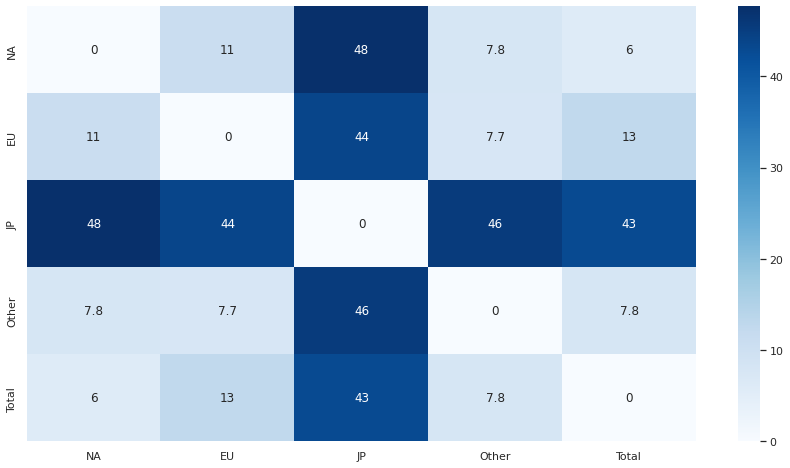

In [49]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(raw1,annot=True, cmap='Blues');

In [50]:
raw2 = pd.DataFrame(ans_NA.head(1000).value_counts('Genre',sort=False)).rename(columns = {0:'NA'}).reset_index()
raw2['EU'] = ans_EU.head(1000).value_counts('Genre',sort=False).values
raw2['JP'] = ans_JP.head(1000).value_counts('Genre',sort=False).values
raw2['Other'] = ans_Other.head(1000).value_counts('Genre',sort=False).values
raw2['Total'] = ans_Total.head(1000).value_counts('Genre',sort=False).values

In [51]:
warnings.filterwarnings(action='ignore')

In [52]:
NA_con= df.sort_values('NA_Sales',ascending=False).head(1000)[df.Year>2005].value_counts('Platform').head(5).index;
EU_con= df.sort_values('EU_Sales',ascending=False).head(1000)[df.Year>2005].value_counts('Platform').head(5).index;
JP_con=df.sort_values('JP_Sales',ascending=False).head(1000)[df.Year>2005].value_counts('Platform').head(5).index;
Other_con=df.sort_values('Other_Sales',ascending=False).head(1000)[df.Year>2005].value_counts('Platform').head(5).index;
Total_con=df.sort_values('Total_Sales',ascending=False).head(1000)[df.Year>2005].value_counts('Platform').head(5).index;

In [53]:
console_df = pd.DataFrame({'NA':NA_con,'EU':EU_con,'JP':JP_con,'Other':Other_con,'Total':Total_con})
console_df

,NA,EU,JP,Other,Total
0,X360,PS3,DS,PS3,X360
1,Wii,X360,3DS,X360,PS3
2,PS3,Wii,PS3,PS2,Wii
3,DS,DS,Wii,Wii,DS
4,PS4,PS4,PSP,PS4,PS4


일본은 휴대용 기기의 강세를 보이며 그에 따른 게임 장르와 선호하는 게임이 달라질수밖에 없다.

**결론: 일본을 제외한 다른 나라들은 선호하는 장르가 비슷하다.
하지만 그 결과가 일본을 공략할땐 롤플레잉 게임을 만들어야 한다는 것은 아니다. 이 결과는 나라별 콘솔의 점유율에 따른 차이기 때문이다.**

# **지역에 따라서 선호하는 게임 장르가 다를까 (결론)**

*   일본을 제외한 다른 국가들은 전세계 판매량과 비슷한 추세를 보인다.
*   구 콘솔들 게임들은 지금의 도출해야하는 결론에 영향이 없다고 판단하여 2005년 이후의 게임들을 분석. (XBOX,PS3 발매일)
*   Wii Sport는 일본 외 국가에서 Wii를 사면 이 게임을 번들로 제공하였기에 이상치로써 제외

In [54]:
rank.head(10) #국가별 판매량 상위 10위.

,NA_Rank,EU_Rank,JP_Rank,Other_Rank,Total_Rank
0,Grand Theft Auto V,Grand Theft Auto V,New Super Mario Bros.,Grand Theft Auto: San Andreas,Grand Theft Auto V
1,Call of Duty: Black Ops,Mario Kart Wii,Pokemon Diamond/Pokemon Pearl,Grand Theft Auto V,Mario Kart Wii
2,Mario Kart Wii,FIFA 15,Pokemon Black/Pokemon White,Call of Duty: Black Ops II,Call of Duty: Black Ops
3,Call of Duty: Modern Warfare 3,Call of Duty: Modern Warfare 3,Monster Hunter Freedom 3,FIFA Soccer 08,Call of Duty: Modern Warfare 3
4,Kinect Adventures!,FIFA 16,New Super Mario Bros. Wii,Pro Evolution Soccer 2008,New Super Mario Bros.
5,Call of Duty: Ghosts,FIFA 14,Animal Crossing: New Leaf,Call of Duty: Black Ops 3,Call of Duty: Black Ops II
6,New Super Mario Bros. Wii,Call of Duty: Black Ops II,Dragon Quest IX: Sentinels of the Starry Skies,Call of Duty: Black Ops,Wii Play
7,Call of Duty: Black Ops II,FIFA Soccer 13,Pokemon X/Pokemon Y,Call of Duty: Modern Warfare 3,New Super Mario Bros. Wii
8,Wii Play,The Sims 3,Monster Hunter Freedom Unite,Mario Kart Wii,Call of Duty: Ghosts
9,Call of Duty: Modern Warfare 2,Call of Duty: Black Ops 3,Pokemon HeartGold/Pokemon SoulSilver,FIFA 15,Call of Duty: Black Ops 3


In [55]:
raw2 #국가별 판매량 상위 1000위 장르 분류.

,Genre,NA,EU,JP,Other,Total
0,Action,249,232,214,239,244
1,Adventure,27,35,58,27,28
2,Fighting,41,41,55,48,43
3,Misc,108,119,102,111,101
4,Platform,64,58,40,52,62
5,Puzzle,22,25,27,18,21
6,Racing,64,80,12,81,69
7,Role-Playing,72,72,280,74,96
8,Shooter,130,140,38,140,128
9,Simulation,53,59,39,46,42


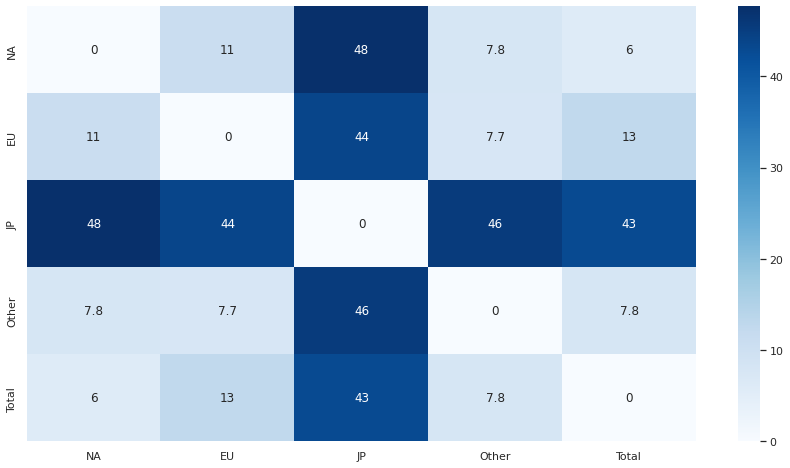

In [56]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(raw1,annot=True, cmap='Blues');
#국가별 장르 갯수 차이의 평균값 히트맵

In [57]:
console_df #나라별 콘솔 점유율 순위 (2005년 이후)

,NA,EU,JP,Other,Total
0,X360,PS3,DS,PS3,X360
1,Wii,X360,3DS,X360,PS3
2,PS3,Wii,PS3,PS2,Wii
3,DS,DS,Wii,Wii,DS
4,PS4,PS4,PSP,PS4,PS4


**결론: 일본을 제외한 다른 나라들은 선호하는 장르가 비슷하다.
하지만 그 결과가 일본을 공략할땐 롤플레잉 게임을 만들어야 한다는 것은 아니다. 이 결과는 나라별 콘솔의 점유율에 따른 차이라고 생각되며 뒤의 연도별 게임의 트렌드를 분석할때 연도별 콘솔을 분석하여 이 가설을 확립시킨다.**

# **연도별 게임의 트렌드가 있을까 (시각화 및 인사이트 추출)**



*   이것도 마찬가지로 2005년 이후의 자료 분석
*   플스, 엑박으로 대거 유저가 유입되기 전엔 콘솔들이 파편화 되어있어 순수 게임 선택에 의한 판매량이라고 보기 어려움.






In [58]:
ans0[ans0.Year > 2004].value_counts('Year').shape

(12,)

In [59]:
Year1 = pd.DataFrame(ans0[ans0.Year > 2004].value_counts('Year')).reset_index()

In [361]:
Year1 = Year1.rename(columns={0:'Total Sales'})

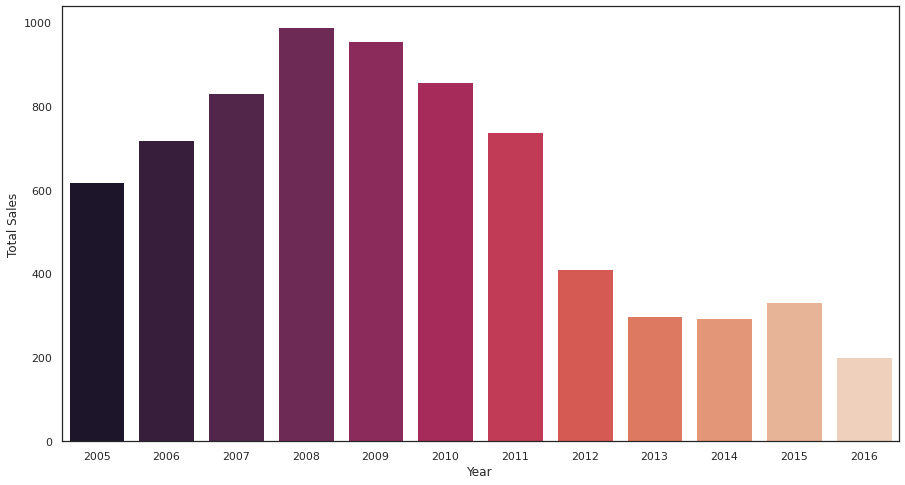

In [370]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("white")
sns.barplot(x='Year',y='Total Sales',data=Year1,palette="rocket");

In [61]:
year_sales = ans0[ans0.Year > 2004].groupby('Year').sum().reset_index()
year_sales

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,2005,245.84,125.00,53.29,41.83,465.96
1,2006,258.65,125.61,73.12,51.49,508.87
2,2007,312.40,157.80,58.28,74.78,603.26
3,2008,367.81,191.16,68.15,95.76,722.88
4,2009,336.09,190.73,59.48,73.69,659.99
5,2010,291.18,169.75,56.76,57.47,575.16
6,2011,251.27,169.10,52.76,55.05,528.18
7,2012,161.26,122.44,52.37,39.04,375.11
8,2013,138.31,110.78,47.51,34.03,330.63
9,2014,146.65,134.75,44.76,42.96,369.12


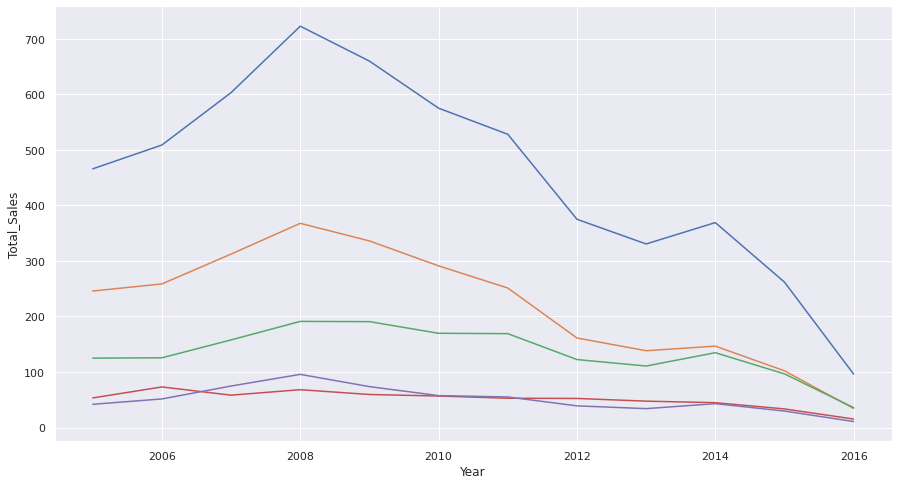

In [62]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.color_palette('pastel')
sns.lineplot(x='Year',y='Total_Sales',data=year_sales)
sns.lineplot(x='Year',y='NA_Sales',data=year_sales)
sns.lineplot(x='Year',y='EU_Sales',data=year_sales)
sns.lineplot(x='Year',y='JP_Sales',data=year_sales)
sns.lineplot(x='Year',y='Other_Sales',data=year_sales);

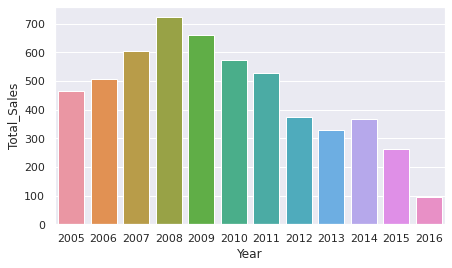

In [63]:
sns.set(rc = {'figure.figsize':(7,4)})
sns.color_palette('pastel')
sns.barplot(x='Year',y='Total_Sales',data=year_sales);

총합 판매량은 해가 갈수록 줄어들고 있다. 이는 모바일 시장이 확대되고 라이브서비스로 인해 판매량으로 집결되지 않아 발생하는 매출 감소라고 판단한다.

In [64]:
def console_cal(X):
  console_cal = pd.DataFrame()
  console_cal['NA']= df[df.Year == X].sort_values('NA_Sales',ascending=False).head(100).value_counts('Platform').head(5).index
  console_cal['EU']= df[df.Year == X].sort_values('EU_Sales',ascending=False).head(100).value_counts('Platform').head(5).index
  console_cal['JP']= df[df.Year == X].sort_values('JP_Sales',ascending=False).head(100).value_counts('Platform').head(5).index
  console_cal['Other']= df[df.Year == X].sort_values('Other_Sales',ascending=False).head(100).value_counts('Platform').head(5).index
  console_cal['Total']= df[df.Year == X].sort_values('Total_Sales',ascending=False).head(100).value_counts('Platform').head(5).index
  return console_cal

In [65]:
console_year = pd.DataFrame()
for i in range(2005,2017):
  console_year[i] = console_cal(i)['Total']

In [66]:
console_year #상위 100개 게임 기준 기종 순위

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,PS2,PS2,DS,Wii,PS3,X360,PS3,PS3,PS3,PS4,PS4,PS4
1,DS,DS,Wii,X360,Wii,PS3,X360,X360,X360,PS3,XOne,XOne
2,PSP,X360,X360,DS,X360,Wii,Wii,3DS,3DS,X360,3DS,3DS
3,XB,PSP,PS3,PS3,DS,DS,3DS,PC,PS4,XOne,PS3,PC
4,GC,Wii,PS2,PS2,PS2,PC,PC,Wii,XOne,3DS,X360,WiiU


In [67]:
console_sales = pd.DataFrame()
console_jp_sales = pd.DataFrame()
for i in range(2005,2017):
  con1 = df[df.Year == i].sort_values('Total_Sales',ascending=False).groupby('Platform').sum().sort_values('Total_Sales',ascending=False).index[0:5]
  con2 = df[df.Year == i].sort_values('Total_Sales',ascending=False).groupby('Platform').sum()
  console_sales[i] = con1

for i in range(2005,2017):
  con1 = df[df.Year == i].sort_values('JP_Sales',ascending=False).groupby('Platform').sum().sort_values('JP_Sales',ascending=False).index[0:5]
  con2 = df[df.Year == i].sort_values('JP_Sales',ascending=False).groupby('Platform').sum()
  console_jp_sales[i] = con1

In [68]:
console_sales #총 판매량 기준 기종 순위

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,PS2,Wii,Wii,Wii,Wii,X360,PS3,PS3,PS3,PS4,PS4,PS4
1,DS,DS,DS,DS,PS3,PS3,X360,X360,X360,XOne,XOne,XOne
2,XB,PS2,X360,X360,DS,Wii,Wii,3DS,3DS,PS3,3DS,3DS
3,PSP,PSP,PS2,PS3,X360,DS,3DS,PC,PS4,3DS,PS3,WiiU
4,GBA,X360,PS3,PS2,PSP,PSP,PC,Wii,WiiU,X360,WiiU,PSV


In [69]:
console_jp_sales

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,DS,DS,DS,DS,DS,PSP,PS3,3DS,3DS,3DS,3DS,3DS
1,PS2,PS2,Wii,Wii,Wii,DS,PSP,PS3,PS3,PSV,PS4,PS4
2,GBA,Wii,PS2,PSP,PS3,PS3,3DS,PSP,PSV,PS3,PSV,PSV
3,PSP,PSP,PSP,PS3,PSP,Wii,Wii,DS,WiiU,WiiU,PS3,PS3
4,GC,GBA,PS3,PS2,X360,X360,DS,Wii,PSP,PS4,WiiU,WiiU


전세계 평균 기기 순위에 비해 일본의 순위는 휴대용 기기의 순위가 높다. 앞에서 세운 가설을 뒷받침하는 증거이다.

In [70]:
df1 = df.copy() #카피본 리셋 버튼

In [71]:
ans = df1[df1.Year > 2004].groupby('Platform').sum().reset_index().sort_values('Total_Sales',ascending=False).reset_index(drop=True)

In [72]:
plat2 = []
def platform_cal(X):
  plat1 = df1[df1.Year == X].groupby('Platform').sum().reset_index()
  ans = plat1.Total_Sales[plat1.Platform.str.contains('3DS|WiiU|PSP|DS|GBA') == True].sum()/plat1.Total_Sales.sum()
  return ans

for i in range(2005,2017):
  plat2.append(round(platform_cal(i),3));

plat3 = pd.DataFrame(plat2)
plat3.index = range(2005,2017)
plat3.reset_index(inplace=True);

In [73]:
plat4 = []
def platform_cal_jp(X):
  plat1 = df1[df1.Year == X].groupby('Platform').sum().reset_index()
  ans2 = plat1.JP_Sales[plat1.Platform.str.contains('3DS|WiiU|PSP|DS|GBA') == True].sum()/plat1.JP_Sales.sum()
  return ans2

for i in range(2005,2017):
  plat4.append(round(platform_cal_jp(i),3));

plat5 = pd.DataFrame(plat4)
plat5.index = range(2005,2017)
plat5.reset_index(inplace=True);

In [342]:
plat3 = plat3.rename(columns={'index':'Year',0:'ratio'})
plat5 = plat5.rename(columns={'index':'Year',0:'ratio'})

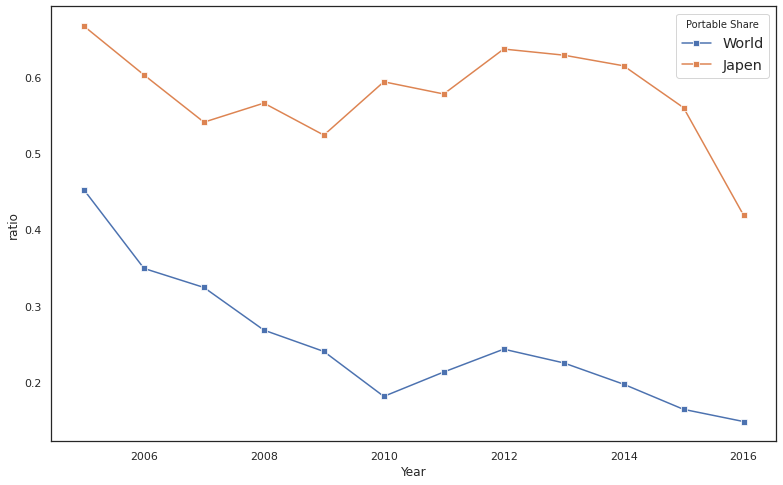

In [357]:
sns.set(rc = {'figure.figsize':(13,8)})
sns.set_style("white")
sns.lineplot(x='Year',y='ratio',data=plat3,marker='s')
sns.lineplot(x='Year',y='ratio',data=plat5,marker='s')
plt.legend(labels=["World","Japen"], title = "Portable Share", 
           fontsize = 'large', title_fontsize = "10");
#일본과 전세계의 휴대용 기기 점유율 차이

휴대용 게임기의 점유율이 연마다 대폭 하락하고 있는데 이는 소비자의 요구가 거치형으로 넘어간 것이 아닌 모바일 시장으로 대체되었기 때문이다. 현재 게임 시장에선 스위치 이외의 휴대용 게임기는 전멸했으며 스위치 또한 반거치 게임기이다. 우리가 이를 통해 알수있는 것은 하드웨어의 발전과 콘솔 독점에 의한 제약이 많이 없어졌으니 어떤 기기를 선택해 개발할 것인가에 대한 생각은 할 필요가 없어졌다.

그렇다면 이 사실을 바탕으로 연도별 게임의 트렌드를 살펴보도록 하자. 우선적으로 IP별로 판매량을 집계하기 위해 split한 단어들을 이용하여 이 단어가 포함된 경우 판매량이 1천만장 이상인 단어만 추출.

In [75]:
ans1 = ans0.copy()[ans0.Year > 2004]

In [76]:
top2000 = ans1.sort_values('Total_Sales',ascending=False).head(2000)

In [77]:
asd = pd.DataFrame(top2000.Name.str.split().sum()).drop_duplicates().reset_index(drop=True).rename(columns={0:'name'})

In [78]:
asdin1 = asd[asd.name.str.contains('\W') == True].index


In [79]:
asd = asd.drop(asdin1)

In [80]:
asd = asd.reset_index(drop=True)

In [81]:
seeee = []
assss = pd.DataFrame()
def seee(X):
  aaa = ans1.Total_Sales[ans1.Name.str.contains(X) == True].sum()
  if aaa > 10:
    assss[X] = [aaa]
    return aaa

for i in range(asd.shape[0]):
  bbb = seee(asd.name[i])
  seeee.append(bbb)

pd.DataFrame(seeee).reset_index(drop=True).dropna().index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1769, 1806, 1810, 1811, 1861, 1877, 1879, 1943, 1944, 1948],
           dtype='int64', length=482)

In [82]:
assss1 = assss.T.reset_index().rename(columns={'index':'name',0:'total_sales'})

In [83]:
for i in range(assss1.shape[0]):
  if len(assss1.name[i]) < 4: #3글자 이상만 추출
    assss1.name.loc[i]= 0

In [84]:
assss2 = assss1.drop(assss1[assss1.name == 0].index).reset_index(drop=True)

In [91]:
assss2.name[assss2.total_sales > 20].values

array(['Sports', 'Grand', 'Theft', 'Auto', 'Mario', 'Kart', 'Resort',
       'Call', 'Black', 'Modern', 'Warfare', 'Super', 'Play', 'Ghosts',
       'Nintendogs', 'Andreas', 'Minecraft', 'Plus', 'Advanced', 'Kinect',
       'Brain', 'Train', 'Your', 'Minutes', 'Elder', 'Scrolls', 'FIFA',
       'Pokemon', 'Duty', 'Battlefield', 'Guitar', 'Hero', 'Legends',
       'Rock', 'Soccer', 'World', 'LEGO', 'Star', 'Sims', 'White',
       'Training', 'Need', 'Videogame', 'Creed', 'Sonic', 'Olympic',
       'Games', 'Smash', 'Dead', 'Just', 'Dance', 'Destiny', 'Fallout',
       'Animal', 'Wild', 'Halo', 'Original', 'Adventures', 'Wars',
       'Battlefront', 'Galaxy', 'City', 'Arkham', 'Speed', 'Land', 'Gran',
       'Turismo', 'Last', 'Force', 'Unleashed', 'Tour', 'Madden',
       'Marvel', 'Heroes', 'Fitness', 'Watch', 'Party', 'Legend',
       'Resident', 'Evil', 'Medal', 'Honor', 'Harry', 'Evolution', '2008',
       'Kong', 'Kingdom', 'Hearts', 'Version', 'Final', 'Fantasy',
       'SmackDown

In [335]:
ip_sort = ['Grand Theft Auto', 'Mario','Call of Duty','Elder Scrolls','FIFA','Pokemon','Battlefield','Guitar Hero','LEGO','Sims','Assassin\'s Creed','Super Smash Bros','Halo','Batman','Need for Speed','Gran Turismo','Medal of Honor'
,'Harry Potter','Kingdom Hearts','SmackDown','Madden','Final Fantasy','Uncharted','Metal Gear Solid','Monster Hunter','NCAA','Sonic','Fallout','Resident Evil','Minecraft', 'Far Cry', 'Just Dance']

In [333]:
ans1.Total_Sales[ans1.Name.str.contains('Just Dance')].sum()

58.89

In [443]:
df[df.Name.str.contains('Medal of Honor')].groupby('Year').sum()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Year,,,,,
1998.0,1.44,1.09,0.00,0.14,2.67
2000.0,0.54,0.37,0.00,0.06,0.97
2002.0,4.44,3.32,0.17,1.07,9.00
2003.0,3.18,2.72,0.13,0.86,6.89
2005.0,1.40,0.93,0.14,0.24,2.71
2006.0,0.86,1.11,0.01,0.66,2.64
2007.0,1.60,1.73,0.10,0.68,4.11
2010.0,3.03,2.09,0.11,0.71,5.94
2012.0,1.19,1.27,0.07,0.42,2.95


In [444]:
df[df.Name.str.contains('Call of Duty')].groupby('Year').sum()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Year,,,,,
2004.0,2.60,1.60,0.01,0.29,4.50
2005.0,1.81,0.10,0.01,0.16,2.08
2006.0,4.17,2.43,0.05,0.91,7.56
2007.0,10.49,6.85,0.42,2.64,20.40
2008.0,9.91,4.93,0.00,2.77,17.61
2009.0,14.84,8.56,0.46,3.18,27.04
2010.0,17.64,9.50,0.59,3.36,31.09
2011.0,15.79,11.36,0.62,3.37,31.14
2012.0,14.88,11.57,0.79,4.18,31.42


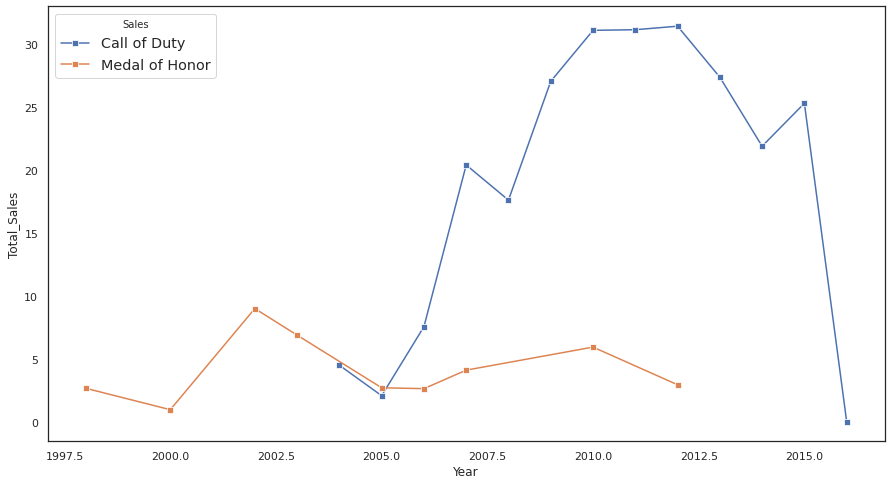

In [449]:
sns.lineplot(x='Year',y='Total_Sales',data = df[df.Name.str.contains('Call of Duty')].groupby('Year').sum().reset_index(),marker='s')
sns.lineplot(x='Year',y='Total_Sales',data = df[df.Name.str.contains('Medal of Honor')].groupby('Year').sum().reset_index(),marker='s')
plt.legend(labels=["Call of Duty","Medal of Honor"], title = "Sales", 
           fontsize = 'large', title_fontsize = "10");

In [336]:
list_ip = []
list_ip2 = []
list_ip3 = []
list_ip4 = []
list_ip5 = []
list_ip6 = []
list_ip7 = []
list_ip8 = []
list_ip9 = []
list_ip10 = []

ans9 = pd.DataFrame()
ans9['IP'] = ip_sort
for i in range(32):
  list_ip.append(ans1.NA_Sales[ans1.Name.str.contains(ip_sort[i]) == True].sum())
  list_ip2.append(ans1.EU_Sales[ans1.Name.str.contains(ip_sort[i]) == True].sum())
  list_ip3.append(ans1.JP_Sales[ans1.Name.str.contains(ip_sort[i]) == True].sum())
  list_ip4.append(ans1.Other_Sales[ans1.Name.str.contains(ip_sort[i]) == True].sum())
  list_ip5.append(ans1.Total_Sales[ans1.Name.str.contains(ip_sort[i]) == True].sum())
  list_ip6.append(ans1.Genre[ans1.Name.str.contains(ip_sort[i]) == True].head(1).values)
  list_ip7.append(df.Publisher[df.Name.str.contains(ip_sort[i]) == True].head(1).values)
  list_ip8.append(ans1.Total_Sales[ans1.Name.str.contains(ip_sort[i]) == True].shape[0])
  list_ip9.append(ans1.Total_Sales[ans1.Name.str.contains(ip_sort[i]) == True].max())
  ans49 = ans1[ans1.Name.str.contains(ip_sort[i]) == True].sort_values('Total_Sales').tail(1)
  list_ip10.append(ans49.Name.values)

ans9['NA_Sales']= list_ip
ans9['EU_Sales']= list_ip2
ans9['JP_Sales']= list_ip3
ans9['Other_Sales']= list_ip4
ans9['Total_Sales']= list_ip5
ans9['Genre'] = list_ip6
ans9['Publisher'] = list_ip7
ans9['Games'] = list_ip8
ans9['Per_Games'] = round(ans9['Total_Sales']/ans9['Games'],2)
ans9['Hit_Game'] = list_ip9
ans9['Hit_Game_Name'] = list_ip10

ans10 = ans9.sort_values('Total_Sales',ascending=False).reset_index(drop=True)
ans10

,IP,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Genre,Publisher,Games,Per_Games,Hit_Game,Hit_Game_Name
0,Mario,123.39,85.17,49.90,22.65,281.11,[Misc],[Nintendo],52,5.41,35.83,[Mario Kart Wii]
1,Call of Duty,126.79,82.11,4.19,29.84,242.93,[Shooter],[Activision],19,12.79,31.04,[Call of Duty: Black Ops]
2,FIFA,28.95,93.53,1.44,29.67,153.59,[Sports],[Electronic Arts],24,6.40,19.02,[FIFA 15]
3,LEGO,68.27,45.93,0.52,15.33,130.05,[Action],[LucasArts],24,5.42,15.73,[LEGO Star Wars: The Complete Saga]
4,Pokemon,38.49,24.39,33.83,6.22,102.93,[Misc],[Nintendo],22,4.68,18.35,[Pokemon Diamond/Pokemon Pearl]
5,Grand Theft Auto,42.04,32.35,2.38,22.76,99.53,[Action],[Take-Two Interactive],5,19.91,55.92,[Grand Theft Auto V]
6,Madden,71.84,4.27,0.05,8.03,84.19,[Sports],[Electronic Arts],14,6.01,10.06,[Madden NFL 07]
7,Assassin's Creed,39.34,31.88,1.45,10.91,83.58,[Adventure],[Ubisoft],15,5.57,13.20,[Assassin's Creed IV: Black Flag]
8,Sonic,31.76,29.80,2.94,8.14,72.64,[Misc],[Sega],32,2.27,13.19,[Mario & Sonic at the Olympic Games]
9,Need for Speed,31.20,29.39,0.80,11.09,72.48,[Racing],[Electronic Arts],14,5.18,14.08,[Need for Speed: Most Wanted]


In [434]:
ans1[ans1.Name.str.contains('Call of Duty') == True]

,Name,Genre,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1217,Call of Duty 2,Shooter,2005,1.81,0.10,0.01,0.16,2.08
1218,Call of Duty 3,Shooter,2006,4.17,2.43,0.05,0.91,7.56
1219,Call of Duty 4: Modern Warfare,Shooter,2007,9.97,5.82,0.42,2.05,18.26
1220,Call of Duty Black Ops: Declassified,Action,2012,0.80,0.52,0.07,0.30,1.69
1221,Call of Duty: Advanced Warfare,Shooter,2014,10.44,8.18,0.34,2.93,21.89
1222,Call of Duty: Black Ops,Shooter,2010,17.59,9.50,0.59,3.36,31.04
1223,Call of Duty: Black Ops 3,Shooter,2015,11.89,9.56,0.43,3.42,25.30
1224,Call of Duty: Black Ops II,Shooter,2012,14.08,11.05,0.72,3.88,29.73
1226,Call of Duty: Ghosts,Shooter,2013,14.92,9.05,0.48,2.92,27.37
1227,Call of Duty: Modern Warfare 2,Shooter,2009,13.52,8.11,0.46,3.01,25.10


이 단어들을 이용하여 IP별로 분류. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스에 포함됨.

# **연도별 게임의 트렌드가 있을까 (결론)**

In [386]:
year_plat = pd.DataFrame()

pd.concat([pd.DataFrame(df[df.Year == 2006].value_counts(df.Platform, normalize=True)),pd.DataFrame(df[df.Year == 2005].value_counts(df.Platform, normalize=True))])

,0
Platform,
PS2,0.256487
DS,0.199601
PSP,0.188623
X360,0.092814
XB,0.061876
PC,0.050898
Wii,0.044910
GC,0.039920
GBA,0.037924


In [ ]:
year_plat = pd.DataFrame()

for i in range(2005,2017):
  year_plat = pd.concat([year_plat,pd.DataFrame(df[df.Year == i].value_counts(df.Platform, normalize=True))],axis=1)

year_plat.columns = [2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]

year_plat1 = year_plat

In [ ]:
year_plat1.fillna(0)

In [419]:
df[df.Year == 2005].groupby('Platform').sum().drop(['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales'],axis=1)

,Total_Sales
Platform,
DS,130.76
GBA,33.80
GC,27.62
PC,4.40
PS2,163.66
PSP,44.18
X360,8.31
XB,49.03


In [422]:
year_plat = pd.DataFrame()

for i in range(2005,2017):
  year_plat = pd.concat([year_plat,df[df.Year == i].groupby('Platform').sum().drop(['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales'],axis=1)],axis=1)

year_plat.columns = [2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]

year_plat1 = year_plat

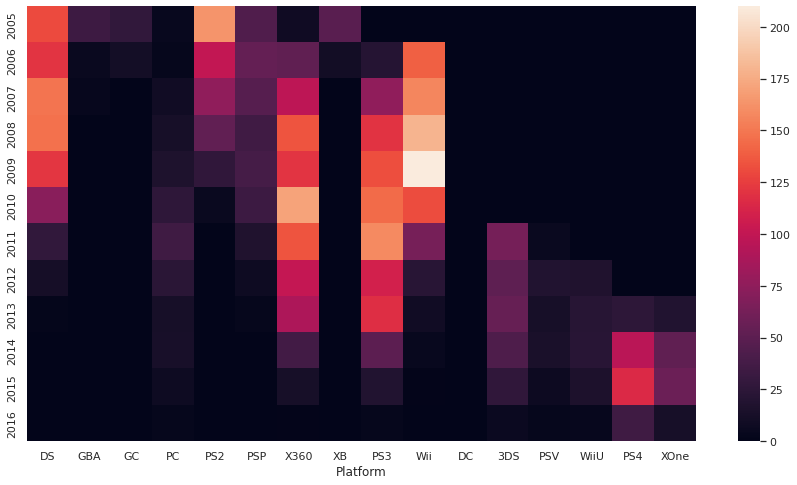

In [430]:
sns.heatmap(data=year_plat1.T.fillna(0));

In [326]:
df_rank = pd.DataFrame()

for i in range(2005,2017):
  df_rank[i] = ans1[ans1.Year == i].sort_values('Total_Sales',ascending=False).head(15).iloc[:,0].values

df_rank

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Nintendogs,Wii Sports,Wii Fit,Mario Kart Wii,Wii Sports Resort,Call of Duty: Black Ops,Call of Duty: Modern Warfare 3,Call of Duty: Black Ops II,Call of Duty: Ghosts,Grand Theft Auto V,Call of Duty: Black Ops 3,Minecraft
1,Mario Kart DS,New Super Mario Bros.,Call of Duty 4: Modern Warfare,Grand Theft Auto: San Andreas,New Super Mario Bros. Wii,Kinect Adventures!,The Elder Scrolls V: Skyrim,FIFA Soccer 13,FIFA 14,Call of Duty: Advanced Warfare,FIFA 16,FIFA 17
2,Brain Age: Train Your Brain in Minutes a Day,Wii Play,Guitar Hero III: Legends of Rock,Call of Duty: World at War,Call of Duty: Modern Warfare 2,Pokemon Black/Pokemon White,Battlefield 3,Need for Speed: Most Wanted,Pokemon X/Pokemon Y,FIFA 15,Fallout 4,Tom Clancy's The Division
3,Brain Age 2: More Training in Minutes a Day,Pokemon Diamond/Pokemon Pearl,LEGO Star Wars: The Complete Saga,LEGO Batman: The Videogame,Wii Fit Plus,Red Dead Redemption,FIFA 12,Assassin's Creed III,Battlefield 4,Destiny,Star Wars Battlefront (2015),Uncharted 4: A Thief's End
4,Animal Crossing: Wild World,Madden NFL 07,Halo 3,Mario & Sonic at the Olympic Games,The Sims 3,FIFA Soccer 11,Just Dance 3,New Super Mario Bros. 2,Assassin's Creed IV: Black Flag,Super Smash Bros. for Wii U and 3DS,NBA 2K16,Far Cry: Primal
5,Grand Theft Auto: Liberty City Stories,The Legend of Zelda: Twilight Princess,Super Mario Galaxy,Super Smash Bros. Brawl,Pokemon HeartGold/Pokemon SoulSilver,Gran Turismo 5,Mario Kart 7,Halo 4,The Last of Us,Pokemon Omega Ruby/Pokemon Alpha Sapphire,Madden NFL 16,Overwatch
6,Need for Speed Underground 2,The Elder Scrolls IV: Oblivion,Assassin's Creed,LEGO Indiana Jones: The Original Adventures,Assassin's Creed II,Halo: Reach,Batman: Arkham City,Animal Crossing: New Leaf,LEGO Marvel Super Heroes,Diablo III,The Witcher 3: Wild Hunt,LEGO Marvel's Avengers
7,Madden NFL 06,Call of Duty 3,FIFA Soccer 08,Star Wars: The Force Unleashed,FIFA Soccer 10,Zumba Fitness,Super Mario 3D Land,Just Dance 4,Donkey Kong Country Returns,Watch Dogs,Batman: Arkham Knight,Doom (2016)
8,Resident Evil 4,LEGO Star Wars II: The Original Trilogy,Mario Party DS,Guitar Hero: World Tour,Resident Evil 5,Just Dance 2,Assassin's Creed: Revelations,Pokemon Black 2/Pokemon White 2,Kingdom Hearts,Far Cry 4,Metal Gear Solid V: The Phantom Pain,Madden NFL 17
9,LEGO Star Wars: The Video Game,Guitar Hero II,Halo 2,Fallout 3,Mario & Sonic at the Olympic Winter Games,Medal of Honor,Mortal Kombat,Far Cry 3,NBA 2K14,Assassin's Creed: Unity,LEGO Jurassic World,Dark Souls III


In [4]:
from google.colab import files
uploaded = files.upload();

Saving SteamCharts.csv to SteamCharts.csv


In [5]:
steam_rank = pd.DataFrame()
steam_df = pd.read_csv('SteamCharts.csv', encoding='latin_1')

for i in range(2012,2022):
  steam_rank[i] = steam_df[steam_df.year == i].groupby('gamename').sum().sort_values('avg',ascending=False).head(15).index

steam_rank

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Dota 2,Dota 2,Dota 2,Dota 2,Dota 2,Dota 2,PLAYERUNKNOWN'S BATTLEGROUNDS,Dota 2,Counter-Strike: Global Offensive,Counter-Strike: Global Offensive
1,Team Fortress 2,Team Fortress 2,Counter-Strike: Global Offensive,Counter-Strike: Global Offensive,Counter-Strike: Global Offensive,PLAYERUNKNOWN'S BATTLEGROUNDS,Dota 2,Counter-Strike: Global Offensive,Dota 2,Dota 2
2,Counter-Strike,Sid Meier's Civilization V,Team Fortress 2,Team Fortress 2,Team Fortress 2,Counter-Strike: Global Offensive,Counter-Strike: Global Offensive,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS
3,The Elder Scrolls V: Skyrim,The Elder Scrolls V: Skyrim,Sid Meier's Civilization V,Grand Theft Auto V,Grand Theft Auto V,Grand Theft Auto V,Tom Clancy's Rainbow Six Siege,Tom Clancy's Rainbow Six Siege,Grand Theft Auto V,Rust
4,Counter-Strike: Source,Counter-Strike: Global Offensive,Football Manager 2014,Football Manager 2015,Sid Meier's Civilization V,Team Fortress 2,Warframe,Grand Theft Auto V,Tom Clancy's Rainbow Six Siege,Apex Legends
5,Sid Meier's Civilization V,Counter-Strike,The Elder Scrolls V: Skyrim,Sid Meier's Civilization V,ARK: Survival Evolved,Z1 Battle Royale,Grand Theft Auto V,Warframe,Team Fortress 2,Grand Theft Auto V
6,Football Manager 2012,Counter-Strike: Source,Garry's Mod,Garry's Mod,Football Manager 2016,ARK: Survival Evolved,Team Fortress 2,Team Fortress 2,Destiny 2,Team Fortress 2
7,Borderlands 2,Garry's Mod,Counter-Strike,The Elder Scrolls V: Skyrim,Garry's Mod,Warframe,ARK: Survival Evolved,Rust,ARK: Survival Evolved,Tom Clancy's Rainbow Six Siege
8,Counter-Strike: Global Offensive,Borderlands 2,DayZ,Fallout 4,Rocket League,Rocket League,Rocket League,ARK: Survival Evolved,Rust,ARK: Survival Evolved
9,Left 4 Dead 2,Terraria,Warframe,ARK: Survival Evolved,Warframe,Football Manager 2017,Monster Hunter: World,Rocket League,Football Manager 2020,Rocket League


In [6]:
df22 = pd.DataFrame()
for i in range(2018,2022):
  df22[i] = steam_df[steam_df.year == i].groupby('gamename').sum().sort_values('gain').head(30).index

df22

,2018,2019,2020,2021
0,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS,Cyberpunk 2077
1,Monster Hunter: World,Destiny 2,Fall Guys: Ultimate Knockout,Dota 2
2,Dota 2,Dota Underlords,Borderlands 3,Grand Theft Auto V
3,Realm Royale,Sekiro: Shadows Die Twice,Crusader Kings III,Rocket League
4,Far Cry 5,Dota 2,Path of Exile,Phasmophobia
5,<U+592A><U+543E><U+7ED8><U+5377> The Scroll Of...,Resident Evil 2,DOOM Eternal,Destiny 2
6,PAYDAY 2,ATLAS,Destiny 2,Hades
7,Grand Theft Auto V,MORDHAU,Phasmophobia,Home Behind 2
8,Football Manager 2018,Ring of Elysium,Football Manager 2020,<U+4E09><U+56FD><U+7FA4><U+82F1><U+4F20>8 Hero...
9,Jurassic World Evolution,Risk of Rain 2,Temtem,Football Manager 2020


In [7]:
steam_df[steam_df.gamename == 'Borderlands 3']

,gamename,year,month,avg,gain,peak,avg_peak_perc
5648,Borderlands 3,2021,February,8338.27,661.52,15911,52.4057%
5649,Borderlands 3,2021,January,7676.75,-863.72,16501,46.5229%
5650,Borderlands 3,2020,December,8540.47,2811.87,16912,50.4995%
5651,Borderlands 3,2020,November,5728.60,133.48,15189,37.7155%
5652,Borderlands 3,2020,October,5595.13,-3109.99,10199,54.8596%
5653,Borderlands 3,2020,September,8705.12,-168.38,18328,47.4963%
5654,Borderlands 3,2020,August,8873.50,87.83,23377,37.9582%
5655,Borderlands 3,2020,July,8785.67,1651.71,17781,49.4104%
5656,Borderlands 3,2020,June,7133.96,-7839.20,18514,38.5328%
5657,Borderlands 3,2020,May,14973.16,-7200.61,34315,43.6344%


In [8]:
Warf = steam_df[steam_df.gamename == 'Warframe']
Warf['x']=range(97,-1,-1)
Warf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gamename,year,month,avg,gain,peak,avg_peak_perc,x
1044,Warframe,2021,February,39209.96,3085.81,61032,64.2449%,97
1045,Warframe,2021,January,36124.14,134.09,60019,60.1878%,96
1046,Warframe,2020,December,35990.05,-3923.97,70305,51.1913%,95
1047,Warframe,2020,November,39914.02,-1384.76,68553,58.2236%,94
1048,Warframe,2020,October,41298.79,-15032.09,69891,59.0903%,93
...,...,...,...,...,...,...,...,...
1137,Warframe,2013,May,10338.53,-1991.12,19734,52.3894%,4
1138,Warframe,2013,April,12329.65,10369.52,21157,58.2769%,3
1139,Warframe,2013,March,1960.13,1960.13,19099,10.263%,2
1140,Warframe,2013,February,0.00,0.00,1,0%,1


In [9]:
Bord = steam_df[steam_df.gamename == 'Borderlands 3']
Bord['x'] = range(97,97-12,-1)
Bord

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gamename,year,month,avg,gain,peak,avg_peak_perc,x
5648,Borderlands 3,2021,February,8338.27,661.52,15911,52.4057%,97
5649,Borderlands 3,2021,January,7676.75,-863.72,16501,46.5229%,96
5650,Borderlands 3,2020,December,8540.47,2811.87,16912,50.4995%,95
5651,Borderlands 3,2020,November,5728.60,133.48,15189,37.7155%,94
5652,Borderlands 3,2020,October,5595.13,-3109.99,10199,54.8596%,93
5653,Borderlands 3,2020,September,8705.12,-168.38,18328,47.4963%,92
5654,Borderlands 3,2020,August,8873.50,87.83,23377,37.9582%,91
5655,Borderlands 3,2020,July,8785.67,1651.71,17781,49.4104%,90
5656,Borderlands 3,2020,June,7133.96,-7839.20,18514,38.5328%,89
5657,Borderlands 3,2020,May,14973.16,-7200.61,34315,43.6344%,88


In [13]:
Des = steam_df[steam_df.gamename == 'Destiny 2']
Des['x'] = range(97,97-17,-1)
Des

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gamename,year,month,avg,gain,peak,avg_peak_perc,x
817,Destiny 2,2021,February,59394.05,14529.12,131640,45.1185%,97
818,Destiny 2,2021,January,44864.92,-22135.76,79290,56.5833%,96
819,Destiny 2,2020,December,67000.69,-32899.28,139723,47.9525%,95
820,Destiny 2,2020,November,99899.97,49090.57,241843,41.3078%,94
821,Destiny 2,2020,October,50809.40,-2503.01,93741,54.2019%,93
822,Destiny 2,2020,September,53312.41,-10951.33,97247,54.8217%,92
823,Destiny 2,2020,August,64263.74,-4176.01,122520,52.4516%,91
824,Destiny 2,2020,July,68439.75,-9110.48,122236,55.9898%,90
825,Destiny 2,2020,June,77550.23,25712.82,213681,36.2925%,89
826,Destiny 2,2020,May,51837.42,-14382.23,76476,67.7826%,88


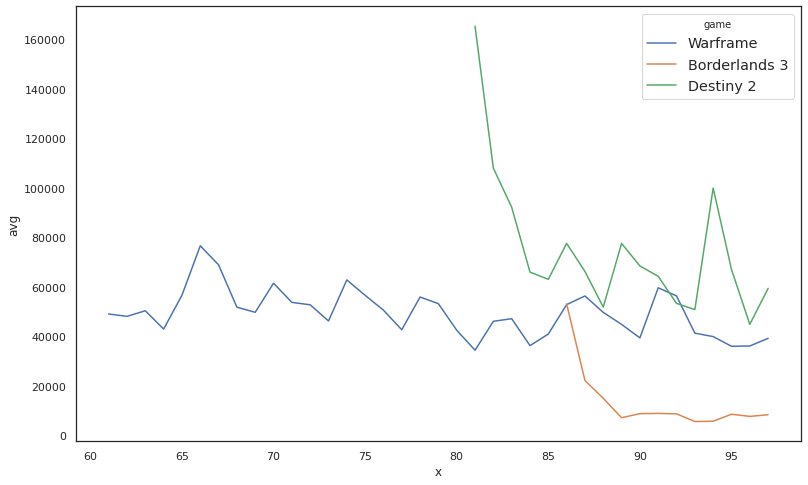

In [24]:
sns.set(rc = {'figure.figsize':(13,8)})
sns.set_style("white")
sns.lineplot(x='x',y='avg',data=Warf[Warf.x > 60])
sns.lineplot(x='x',y='avg',data=Bord)
sns.lineplot(x='x',y='avg',data=Des)
plt.legend(labels=["Warframe","Borderlands 3","Destiny 2"], title = "game", 
           fontsize = 'large', title_fontsize = "10");

# **출고량이 높은 게임에 대한 분석 및 시각화 프로세스 (결론)**

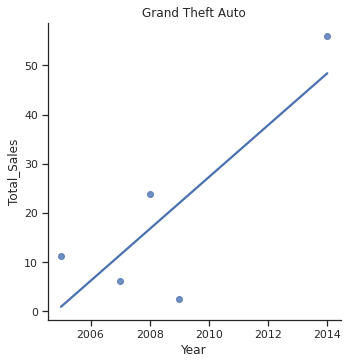

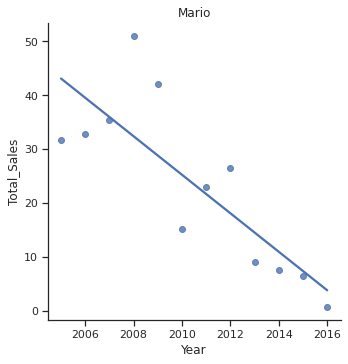

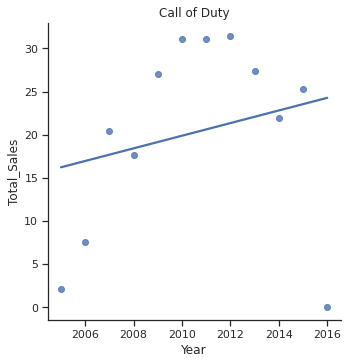

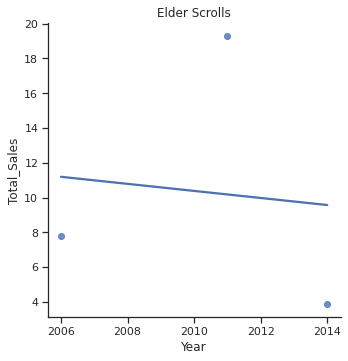

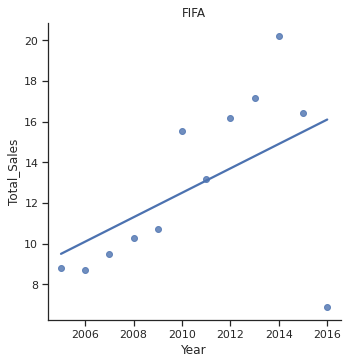

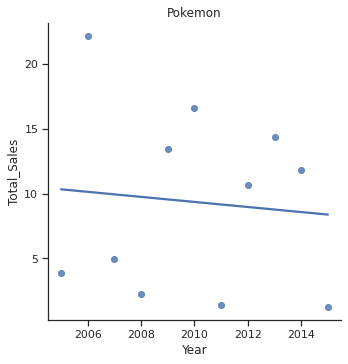

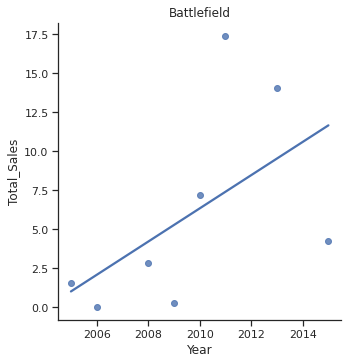

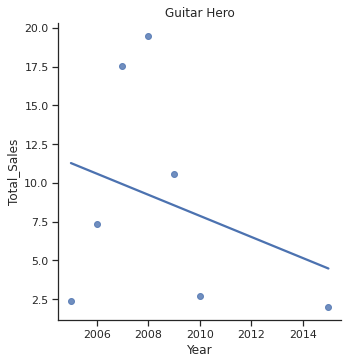

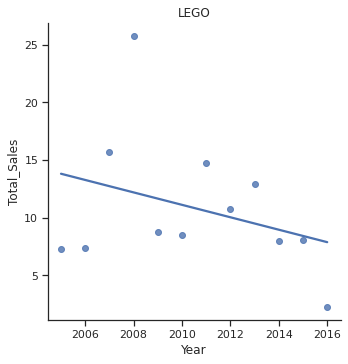

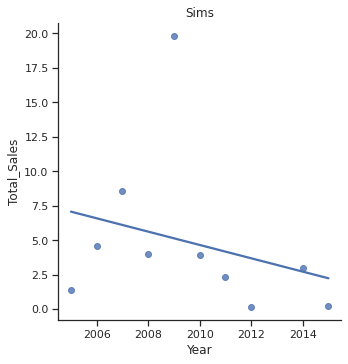

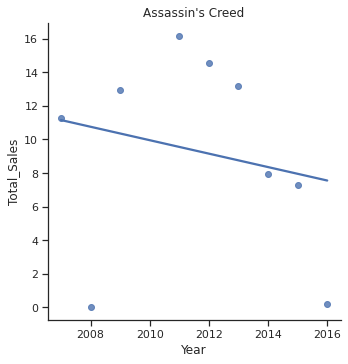

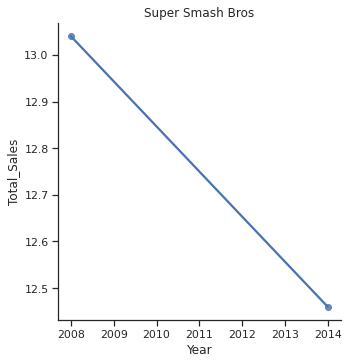

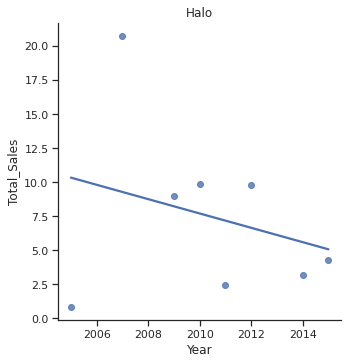

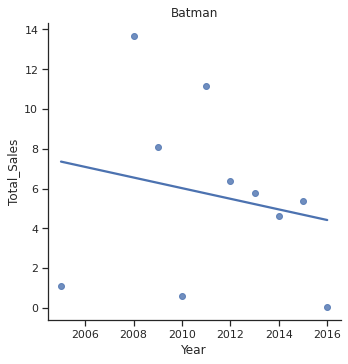

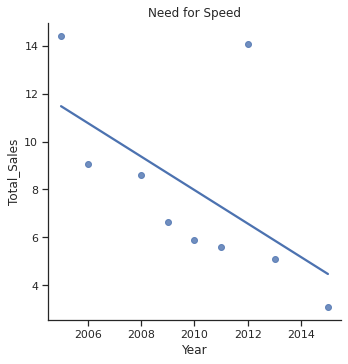

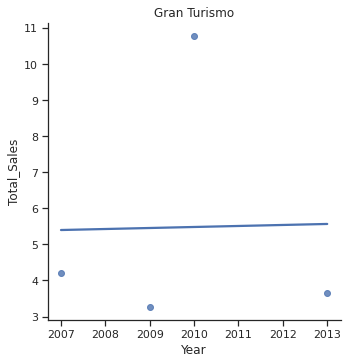

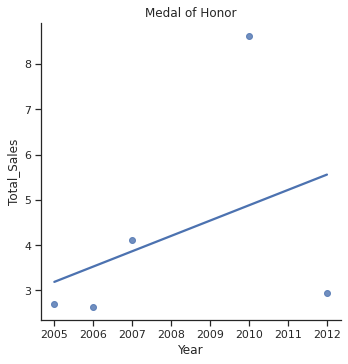

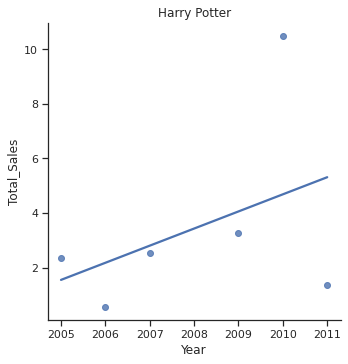

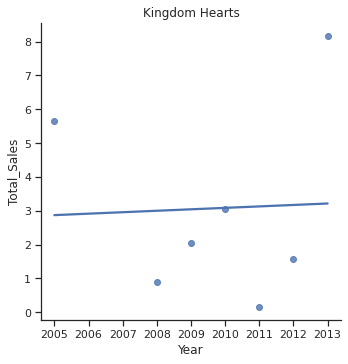

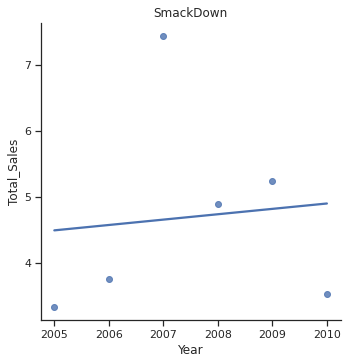

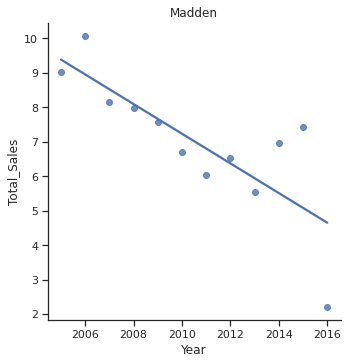

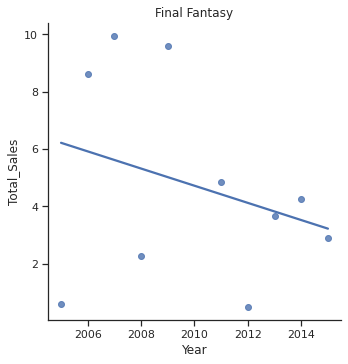

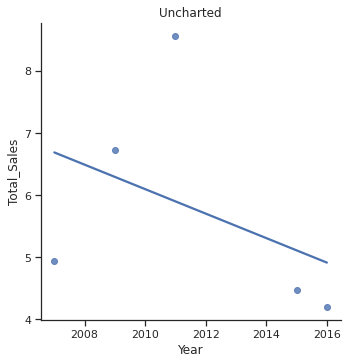

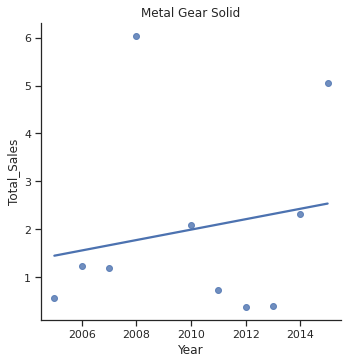

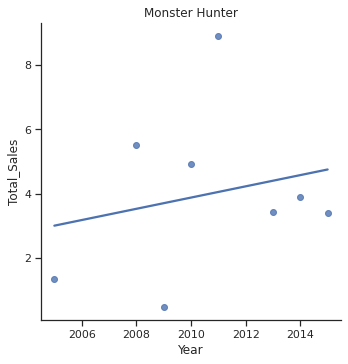

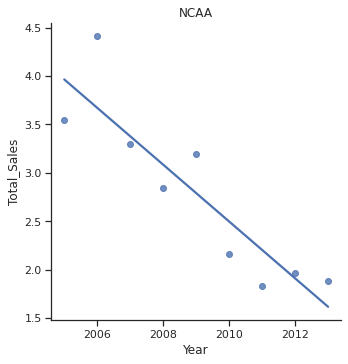

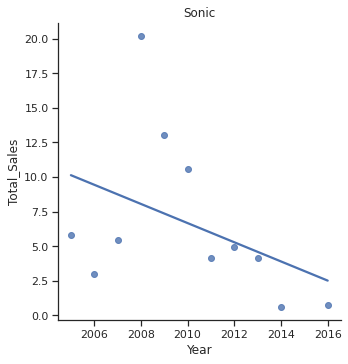

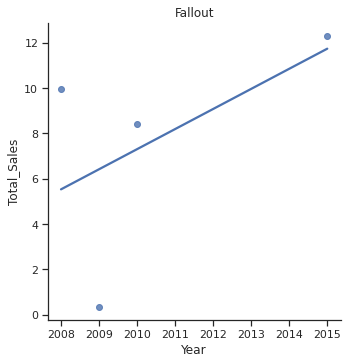

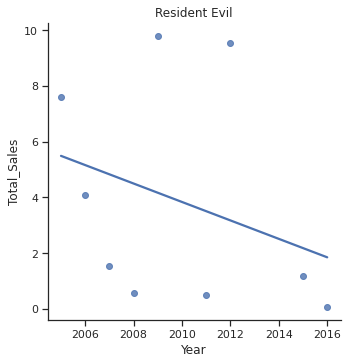

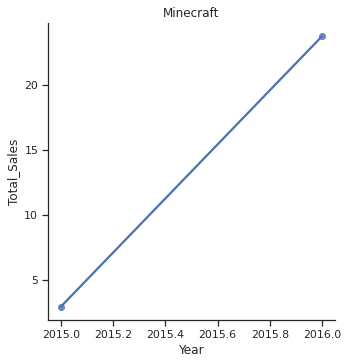

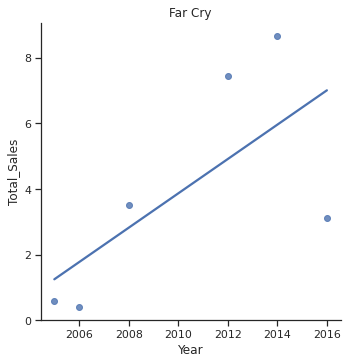

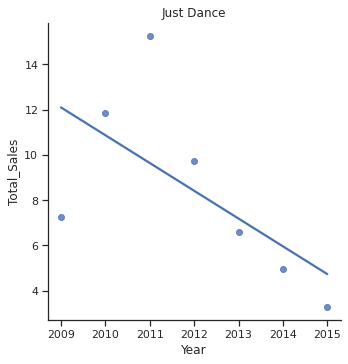

In [337]:
for i in range(32):
  sns.set_theme(style="ticks")
  sns.lmplot(x='Year',y='Total_Sales',data=ans1[ans1.Name.str.contains(ip_sort[i]) == True].groupby('Year').sum().reset_index(),ci=None)
  plt.title(ip_sort[i]);

# **리메이크에 관한 분석 추가.**